In [42]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection                import train_test_split

import tensorflow
from tensorflow                             import data
from tensorflow                             import keras
from tensorflow.keras.preprocessing         import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image   import load_img,img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.layers                import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras.applications          import VGG16, MobileNet
from tensorflow.keras.callbacks             import EarlyStopping



In [37]:
train_data = image_dataset_from_directory(
    directory='Final_Combined',
    labels='inferred',
    label_mode='categorical',
    # Use 20% data as testing data.
    validation_split=0.2,
    subset="training",
    # Set seed to ensure the same split when loading testing data.
    seed=123,
    batch_size=32,
    image_size=(128, 128),
)

test_data = image_dataset_from_directory(
    directory='Final_Combined',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=32,
    image_size=(128, 128),
)

Found 74185 files belonging to 62 classes.
Using 59348 files for training.
Found 74185 files belonging to 62 classes.
Using 14837 files for validation.


In [2]:
Regular_NN = keras.models.load_model("Initial_NN_model_30Nov")
Mobile_Plus_NN = keras.models.load_model("Transfer_Plus_model_30Nov")


In [11]:
def real_life_images(path):
    values = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
    values = list(values)
    img = image.load_img(path, target_size=(128, 128))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = img_array.reshape(-3, 128, 128, 3)
    img_preprocessed = preprocess_input(img_array)
    predictions = probability_model.predict(img_preprocessed)
    df = pd.DataFrame(predictions, columns = values)
    predicted_value = df.idxmax(axis=1)
    print('The model predicts the image to be: ' + predicted_value)


In [12]:
probability_model = tensorflow.keras.Sequential([Mobile_Plus_NN, 
                                         tensorflow.keras.layers.Softmax()])

In [52]:
predictions = probability_model.predict(test_data)


In [55]:
y_pred = np.argmax(predictions, axis=1)



In [56]:
y_pred

array([27, 32, 42, ..., 16, 48, 46])

Some images to test:
Real_Life_Text/test_7.png
Real_Life_Text/test_9.png
Real_Life_Text/test_0.png
Real_Life_Text/test_7-2.png
Real_Life_Text/test_3.png
Real_Life_Text/test_y.png
Real_Life_Text/test_M.png
Real_Life_Text/test_c.png
Real_Life_Text/test_a.png
Real_Life_Text/test_s.png
Real_Life_Text.test_w.png

0    The model predicts the image to be: S
dtype: object


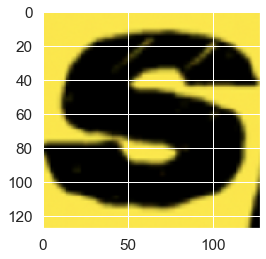

In [92]:
real_life_images('Real_Life_Text/test_spirit_s.png')

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import itertools

In [46]:
true_categories = tensorflow.concat([y for x, y in test_data], axis=0)


In [58]:
true_categories

y_true = np.argmax(true_categories, axis=1)

In [77]:
print(type(y_true))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [78]:
errors = np.vstack((y_true,y_pred))


In [79]:
errors

array([[ 5, 30, 21, ..., 30, 44, 35],
       [27, 32, 42, ..., 16, 48, 46]])

In [80]:
errors_df = pd.DataFrame(errors)

In [82]:
errors_df_t = errors_df.T

In [86]:
errors_df_t = errors_df_t.rename(columns={0: "true", 1: "predicted"})

In [90]:
errors_df_t

errors_df_t['error'] = np.where(errors_df_t['true'] != errors_df_t['predicted']
                     , 1, 0)


In [96]:
errors_df_t

,true,predicted,error
0,5,27,1
1,30,32,1
2,21,42,1
3,3,60,1
4,20,4,1
...,...,...,...
14832,45,41,1
14833,21,21,0
14834,30,16,1
14835,44,48,1


In [97]:
(errors_df_t['error'].sum())/(len(errors_df_t['error']))

0.9820718474085057

ValueError: Must pass 2-d input. shape=(62, 2, 2)

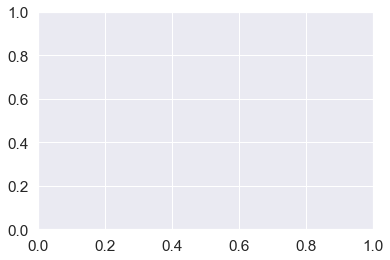

In [74]:


cm = multilabel_confusion_matrix(y_true, y_pred)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()